# Q1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

In [2]:
df.head()  # 데이터 미리보기

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [3]:
df.info()  # 데이터 요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [4]:
# 약국인 데이터만 모아서 df_medical 변수에 담기

df_medical = df[df["상권업종소분류명"] == "약국"].copy()
df_medical.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528
10,21057519,민생약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4889046030200780002048274,NaN,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,NaN,NaN,NaN,128.118615,35.575962
15,21006553,상명약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4713010800103400004022515,NaN,경상북도 경주시 금성로 281,780943.0,38156.0,NaN,1,NaN,129.206670,35.842804
16,21026027,햇살약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4117310100111010002005070,샛별한양아파트,경기도 안양시 동안구 달안로 61,431719.0,14043.0,NaN,NaN,NaN,126.948953,37.396502
24,21228644,화정하나로,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4128112300109690000012921,동원텔,경기도 고양시 덕양구 화정로 47,412737.0,10497.0,NaN,3,NaN,126.831406,37.635165


#### value_counts 이용

In [5]:
df_medical["시도명"].value_counts()

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

# 2번

In [6]:
# "상권업종중분류명"에 무엇이 있나 보기
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [7]:
# 상권업종중분류명 == '수의업' 데이터 보기
df[df["상권업종중분류명"] == "수의업"].copy()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
5,20809147,행신동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4128112800106470014011094,NaN,경기도 고양시 덕양구 행신로 147,412220.0,10517.0,NaN,1,NaN,126.831632,37.619309
12,21145534,목포동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4611010200110500078000665,NaN,전라남도 목포시 영산로 200-1,530806.0,58708.0,NaN,1,NaN,126.390244,34.799439
20,21085006,제일가축병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4136037021102040012005537,NaN,경기도 남양주시 퇴계원면 경춘북로558번길 7-7,472821.0,12126.0,NaN,1,NaN,127.146600,37.647633
23,21228408,강남애견,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,4717012700101640048027271,현대아파트상가,경상북도 안동시 경동로 481,760270.0,36655.0,NaN,NaN,NaN,128.711663,36.566452
25,21055738,축협동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4671025025103420000000164,NaN,전라남도 담양군 담양읍 삼거리길 8-6,517806.0,57347.0,NaN,1,NaN,126.981972,35.310645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91173,16365977,해운대플러스동물병원,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,2635010700113150000015591,해운대삼정코아주상복합,부산광역시 해운대구 세실로 48,612840.0,48110.0,101,1,1-2,129.178469,35.170034
91174,16365867,반창꼬동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4163011400110490001000001,NaN,경기도 양주시 옥정로 151,482130.0,11479.0,NaN,NaN,302,127.090349,37.815362
91213,16131045,서진동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4513014400105010000028021,현대아파트,전라북도 군산시 나운안2길 8,573778.0,54135.0,102,NaN,905,126.705522,35.967977
91242,16109069,아크리스동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,1168010500101600021015764,동화빌딩,서울특별시 강남구 봉은사로104길 10,135881.0,6170.0,NaN,3,NaN,127.061898,37.513707


#### 중분류명 중 '수의업'에 무슨 소분류가 있나 조사해보자

In [8]:
df[df["상권업종중분류명"]=="수의업"]["상권업종소분류명"].unique()

array(['동물병원', '수의업-종합', '수의업-기타'], dtype=object)

#### 소분류명 중 '동물병원'이라는 명백한 분류명이 있으므로 우선 해당 데이터를 담는 변수를 만들자

In [9]:
df_animal_medi = df[df["상권업종소분류명"]=="동물병원"].copy()
df_animal_medi.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
5,20809147,행신동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4128112800106470014011094,NaN,경기도 고양시 덕양구 행신로 147,412220.0,10517.0,NaN,1,NaN,126.831632,37.619309
12,21145534,목포동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4611010200110500078000665,NaN,전라남도 목포시 영산로 200-1,530806.0,58708.0,NaN,1,NaN,126.390244,34.799439
20,21085006,제일가축병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4136037021102040012005537,NaN,경기도 남양주시 퇴계원면 경춘북로558번길 7-7,472821.0,12126.0,NaN,1,NaN,127.146600,37.647633


#### 소분류 중 '수의업-종합', '수의업-기타' 데이터 중 동물병원 데이터가 있나 살펴보아야겠다. 우선 '수의업-종합'부터 보자

In [10]:
# 소분류명이 '수의업-종합' 데이터를 df_ani_agg 변수에 담는다
df_ani_agg =  df[df["상권업종소분류명"] == "수의업-종합"].copy()
df_ani_agg.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
23,21228408,강남애견,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,4717012700101640048027271,현대아파트상가,경상북도 안동시 경동로 481,760270.0,36655.0,NaN,NaN,NaN,128.711663,36.566452
240,22089736,평화드림,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,4161025623100010001255855,NaN,경기도 광주시 곤지암읍 새재길 87,464942.0,12813.0,NaN,1,NaN,127.397343,37.335453
976,21438918,청원동물병원,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,4519010300102790000307052,"청원동물병원,조직환공인중개사,형제꽃",전라북도 남원시 용성로 94,590988.0,55772.0,NaN,NaN,NaN,127.386721,35.408941


#### 상호명에 동물병원이 들어가지 않는 데이터를 살펴보자

In [11]:
df_ani_agg.loc[~df_ani_agg["상호명"].str.contains("동물병원"), "상호명"].unique()

array(['강남애견', '평화드림', '현대장의사', '상주함창수의복전문', '애견사랑', '애견나라', '우리들동물약품',
       '나라애견', '좌천가축병원', '에니멀클리닉컨설팅', '금학상포', '영심이애견샵', '화정동동물종합병',
       '원효애견', '고려애견샵', '신선가축약품', '유니애견용품', '행복한애견세상', '케이씨티메디컬쎈터',
       '뚜비애견', '미미네애견', '새부산애견', '수영애견', '애견프라자', '강사모백화점', '스파애견',
       '스누피애견', '바우애견', '몽이애견샵', '감춘영가축병원', '명품애견', '몽몽애견', '애견용품할인매장까까독',
       '강아지풀애견', '이브애견', '미래애견샵', '경서애견스포츠타운', '애견사료', '애견의꿈', '우리애견',
       '진성애견용품', '꼬마애견', '린애견샵', '애견왕국', '산성애견', '애견미용전문샵', '애견천하',
       '프로애견', '영서가축병원', '세화가축병원', '러브애견', '애견스토리', '한솔애견', '애견스타일',
       '둘리애견', '방주애견샵', '하빈강아지애견농장', '남문동물종합', '애견이좋은사람들', '동해애견센타',
       '제천서라벌애견센타', '한국애견랜드', '코코애견', '몽이애견미용', '우성애견', '애견천국', '애견하우스',
       '피카소애견미용', '안지랑애견마트', '울진가축병원', '동물애견미용', '구리애견미용', '월드애견',
       '백설이애견SHOP', '애견수족관', '서울퍼피', 'BOB애완용품전문점', '애견행복하우스', '제일가축병원',
       '애견은내친구', '101마리', '25시애견센타', '뽀삐애견', '독스애견', '남영가축병원', '신철원애견샵',
       '애견미용마을', '스누피동물변원', '핑코애견', '남대문애견용품', '콩이랑팥지랑애견', '대백애견',
       '대성건강원축산애견', 

#### 병원, 의료원, 메디 글자가 들어간 데이터를 살펴보자. 

In [12]:
df_ani_agg.loc[df_ani_agg["상호명"].str.contains("병원|의료원|메디"), "상호명"].unique()

array(['청원동물병원', '쿨펫동물병원', '프렌즈동물병원', '좌천가축병원', '오렌지동물병원', '삼정동물병원',
       '동물병원', '웰빙동물병원', '케이씨티메디컬쎈터', '사랑동물병원', '현대동물병원', '대구동물병원',
       '햇빛동물병원', '신당햇살동물병원', '감춘영가축병원', '능곡동물병원', '광양동물병원', '제일동물병원',
       '한세진동물병원', '동물병원퍼피하우스', '정동물병원', '조은동물병원', '흥일동물병원', '에이스동물병원',
       '도리원동물병원', '도야동물병원', '안민동물병원', '웰동물병원', '대성동물병원', '삼성동물병원',
       '지행동물병원', '좋은동물병원', '서울동물병원', '영서가축병원', '신영재동물병원', 'BE동물병원',
       '세화가축병원', '한사랑동물병원', '한강동물병원', '하모니동물병원', '학성동물병원', '강남동물병원',
       '우리동물병원', '남양동물병원', '21세기동물병원', '안정현동물병원', '가야동물병원', '울진가축병원',
       '엔젤동물병원', '이솝동물병원', '호수동물병원', '우성동물병원', '탄현동물병원', '사천동물병원',
       '한국동물병원', '탑동물병원', '알프스동물병원', '이동훈동물병원', '삼척동물병원', '가나동물병원',
       '민들레동물병원', '상주동물병원', '힘찬동물병원', '제일가축병원', '다비드동물병원', '개봉동물병원',
       '미미동물병원', '24시소래동물병원', '미소동물병원', '종합동물병원', '행복한동물병원', '남영가축병원',
       '센텀동물병원', '산남동물병원', '이리온동물병원', '노아종합동물병원', '수종합동물병원', '소통동물병원',
       '상대동물병원', '남악동물병원', '광진동물병원', '동부동물병원', '호크동물병원', '정성환동물병원',
       '오창쿨펫동물병원', '삼천동물병원', '승진동물

#### 위의 데이터들은 동물병원 인 듯하다. df_animal_medi에 추가하자

In [13]:
# df_add1 변수에 담아서 df_animal_medi에 추가하자
df_add1 = df_ani_agg.loc[df_ani_agg["상호명"].str.contains("병원|의료원|메디")]
df_add1

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
976,21438918,청원동물병원,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,4519010300102790000307052,"청원동물병원,조직환공인중개사,형제꽃",전라북도 남원시 용성로 94,590988.0,55772.0,NaN,NaN,NaN,127.386721,35.408941
2047,24937857,쿨펫동물병원,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,2623010800101000001027533,이마트트레이더스서면점,부산광역시 부산진구 시민공원로 31,614090.0,47192.0,NaN,3,NaN,129.052578,35.163919
2395,4375930,프렌즈동물병원,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,2914011800109680001009628,상무아파트,광주광역시 서구 상무민주로6번길 9,502820.0,61970.0,1,NaN,NaN,126.859238,35.151592
4857,22256386,좌천가축병원,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,2671025321102490002007708,장안이용원,부산광역시 기장군 장안읍 좌천로 60,619953.0,46033.0,NaN,NaN,NaN,129.243809,35.313427
5797,24489034,오렌지동물병원,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,4825010900112490004084411,NaN,경상남도 김해시 함박로 92,621756.0,50957.0,NaN,2,232,128.864017,35.232151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,16168273,노블동물병원,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,2626010900100640024000001,NaN,부산광역시 동래구 아시아드대로 160,607816.0,47842.0,NaN,NaN,NaN,129.065490,35.198681
90137,16060918,파라곤동물병원,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,1121510900103580009027320,광진동양파라곤,서울특별시 광진구 광나루로 361,143840.0,5003.0,NaN,NaN,NaN,127.069725,37.548424
90360,16269222,백산동물병원,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,1168010100107250080000001,NaN,서울특별시 강남구 논현로86길 22,135921.0,6223.0,NaN,NaN,NaN,127.039337,37.500019
90553,16031175,사직삼보동물병원,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,2626010900100280015021346,NaN,부산광역시 동래구 사직북로63번길 11,607815.0,47860.0,NaN,NaN,NaN,129.057664,35.199777


In [14]:
# 원래 df.append() 함수를 사용하려 했으나 추후 버전에서 해당 기능이 없어진다는 warning이 떠서 pd.concat기능으로 구현하였다.
# 새로운 변수는 df_animal_medical로 하자
df_animal_medical = pd.concat([df_animal_medi, df_add1])
df_animal_medical.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
89995,16168273,노블동물병원,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,2626010900100640024000001,NaN,부산광역시 동래구 아시아드대로 160,607816.0,47842.0,NaN,NaN,NaN,129.065490,35.198681
90137,16060918,파라곤동물병원,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,1121510900103580009027320,광진동양파라곤,서울특별시 광진구 광나루로 361,143840.0,5003.0,NaN,NaN,NaN,127.069725,37.548424
90360,16269222,백산동물병원,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,1168010100107250080000001,NaN,서울특별시 강남구 논현로86길 22,135921.0,6223.0,NaN,NaN,NaN,127.039337,37.500019
90553,16031175,사직삼보동물병원,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,2626010900100280015021346,NaN,부산광역시 동래구 사직북로63번길 11,607815.0,47860.0,NaN,NaN,NaN,129.057664,35.199777
91173,16365977,해운대플러스동물병원,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,2635010700113150000015591,해운대삼정코아주상복합,부산광역시 해운대구 세실로 48,612840.0,48110.0,101,1,1-2,129.178469,35.170034


#### 소분뷰 중 '수의업-기타' 데이터를 살펴보자

In [15]:
# 소분류명이 '수의업-종합' 데이터를 df_ani_etc 변수에 담는다
df_ani_etc =  df[df["상권업종소분류명"] == "수의업-기타"].copy()
df_ani_etc

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
6750,25582924,단디펫,NaN,S,의료,S04,수의업,S04A03,수의업-기타,M73100,...,4111312900104720030051023,NaN,경기도 수원시 권선구 삼천병마로 1588,441850.0,16635.0,NaN,1,NaN,126.963730,37.244161
9266,25456607,또또애견샵,NaN,S,의료,S04,수의업,S04A03,수의업-기타,M73100,...,4111313700109650025032822,NaN,경기도 수원시 권선구 세지로102번길 5,441821.0,16564.0,NaN,1,NaN,127.019138,37.260781
9428,25252140,필도그,NaN,S,의료,S04,수의업,S04A03,수의업-기타,M73100,...,4111313700112830011028451,NaN,경기도 수원시 권선구 세권로 311,441885.0,16551.0,NaN,1,NaN,127.037974,37.252060
10088,25491749,동화나라애견미용,NaN,S,의료,S04,수의업,S04A03,수의업-기타,M73100,...,4111313700110290014028963,NaN,경기도 수원시 권선구 경수대로370번길 33,441822.0,16566.0,NaN,1,NaN,127.025701,37.258898
11852,25506173,버블dog,NaN,S,의료,S04,수의업,S04A03,수의업-기타,M73100,...,1165010100104400033012835,NaN,서울특별시 서초구 동작대로 54-1,137060.0,6677.0,NaN,1,NaN,126.982238,37.481439
12468,20762964,서울가축인공수정소,NaN,S,의료,S04,수의업,S04A03,수의업-기타,M73100,...,4150025021101810102021168,영보상가주택,경기도 이천시 장호원읍 샘재로145번길 64,467902.0,17418.0,NaN,NaN,NaN,127.628942,37.120559
13610,25477166,애견호텔,NaN,S,의료,S04,수의업,S04A03,수의업-기타,M73100,...,1165010100109070005014946,NaN,서울특별시 서초구 방배로 106,137060.0,6665.0,NaN,1,NaN,126.996408,37.483804
24354,25498966,도그랑캐츠랑,NaN,S,의료,S04,수의업,S04A03,수의업-기타,M73100,...,4111312600102440008034858,NaN,경기도 수원시 권선구 권선로 496-1,441110.0,16591.0,NaN,1,NaN,127.005685,37.263606
30171,25498394,펫베베애견,NaN,S,의료,S04,수의업,S04A03,수의업-기타,M73100,...,1165010100109240014014877,수정빌딩,서울특별시 서초구 방배로 113,137060.0,6683.0,NaN,2,NaN,126.995600,37.484166


#### 다행히 데이터가 많지 않다. 그리고 전부 병원과 상관 없는 데이터 인듯 하다. 추가하지 않아도 되겠다.

#### 이제 동물병원의 분포를 살펴보고 시각화해보자

In [16]:
df_animal_medical["시도명"].value_counts()

경기도        1272
서울특별시       753
부산광역시       260
경상남도        255
경상북도        253
인천광역시       251
대구광역시       203
충청남도        190
전라북도        169
강원도         133
전라남도        133
충청북도        124
대전광역시       112
광주광역시       110
울산광역시        89
제주특별자치도      72
세종특별자치시      18
Name: 시도명, dtype: int64

#### 전국 시도명 단위로 시각화 해보자

In [17]:
# 시각화를 위한 폰트설정
import koreanize_matplotlib

<AxesSubplot:>

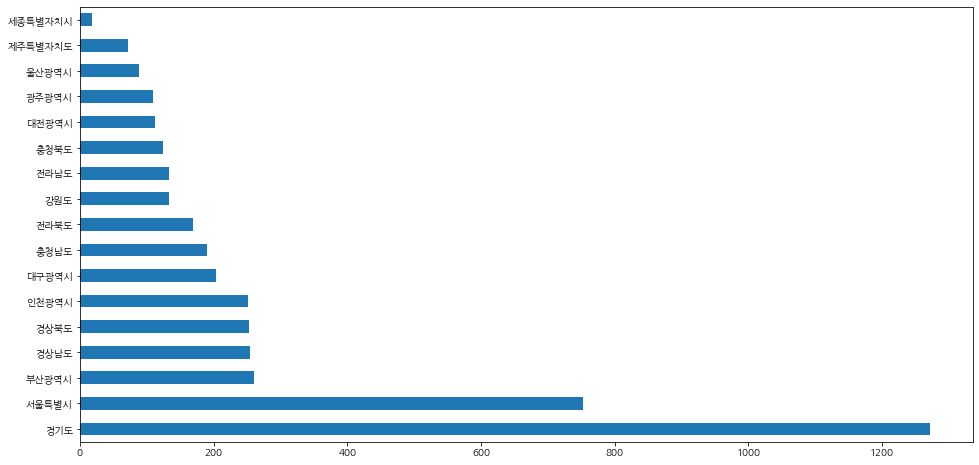

In [18]:
# 판다스 plot으로 그리기
plt.figure(figsize=(16,8))
df_animal_medical["시도명"].value_counts().plot.barh()

<AxesSubplot:xlabel='시도명', ylabel='count'>

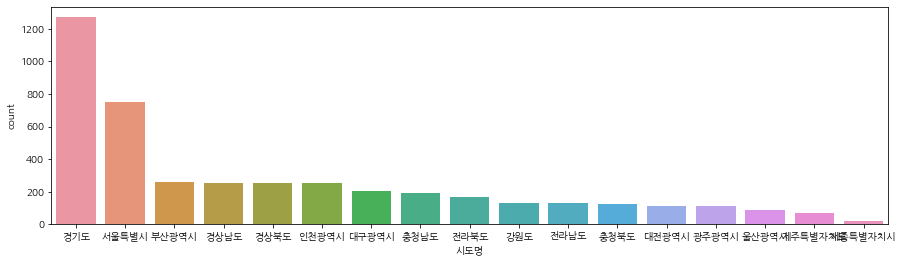

In [19]:
# seaborn으로 그리기
plt.figure(figsize=(15, 4))
sns.countplot(data=df_animal_medical, x="시도명",
             order=df_animal_medical["시도명"].value_counts().index)

<AxesSubplot:xlabel='경도', ylabel='위도'>

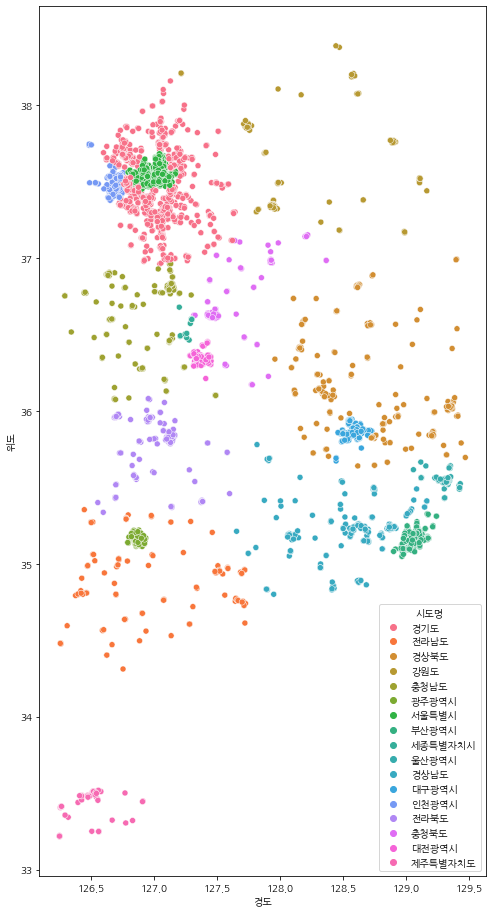

In [20]:
# seaborn의 scatterplot 을 통해 시도명을 기준으로 경도와 위도를 표시해 보자
plt.figure(figsize=(8,16))
sns.scatterplot(data=df_animal_medical, x="경도", y="위도", hue="시도명")

#### 서울의 동물병원 분포를 조사해보자

In [21]:
df_seoul_animal_medical = df_animal_medical[df_animal_medical["시도명"]=="서울특별시"].copy()
df_seoul_animal_medical.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
167,22830101,안박동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,1150010200106280013029592,현대프린스텔빌딩,서울특별시 강서구 양천로 510,157030.0,7548.0,NaN,1,NaN,126.856326,37.56011


<AxesSubplot:>

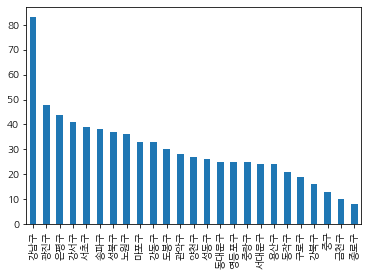

In [22]:
df_seoul_animal_medical["시군구명"].value_counts().plot.bar()

<AxesSubplot:xlabel='시군구명', ylabel='count'>

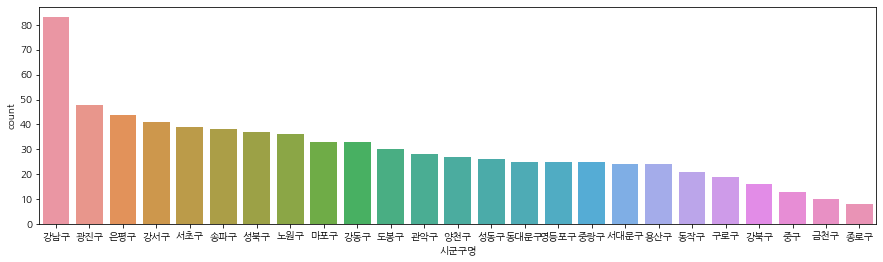

In [23]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df_seoul_animal_medical, x="시군구명", 
              order=df_seoul_animal_medical["시군구명"].value_counts().index)  # order 파라미터로 정렬

<AxesSubplot:xlabel='경도', ylabel='위도'>

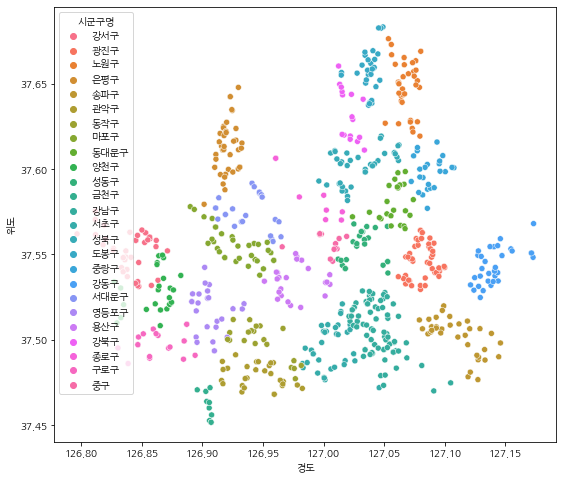

In [24]:
plt.figure(figsize=(9, 8))
sns.scatterplot(data=df_seoul_animal_medical, x="경도", y="위도", hue="시군구명")

### 결론: 동물병원도 병원이나 약국처럼 인구밀도가 높은곳에 더 많이 있다.

# 3번

#### 서울지역 병원인 데이터를 df_seoul 데이터에 담자

In [25]:
df_seoul = df[(df["시도명"]=="서울특별시") & (df["상권업종중분류명"]=="병원")].copy()
df_seoul.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742


#### 서울지역 병원 중 소분류명에 '피부'나 '성형'이 들어간 데이터를 df_seoul_pla에 담자

In [26]:
df_seoul_pla = df_seoul[df_seoul["상권업종소분류명"].str.contains("피부|성형")].copy()
df_seoul_pla.tail(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91243,16131207,UBA성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1168010700105010000000001,신사미타워,서울특별시 강남구 강남대로 616,135887.0,6035.0,NaN,5,502,127.019778,37.516843
91285,16131940,대한피부과학연구소,NaN,S,의료,S01,병원,S01B16,피부과,Q86201,...,1168010100108320007025977,황화빌딩,서울특별시 강남구 강남대로 320,135936.0,6252.0,NaN,NaN,1108,127.031028,37.491842
91287,16133165,가톨릭정형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1168010800102370011008621,파크랜드빌딩,서울특별시 강남구 언주로 601,135546.0,6109.0,NaN,NaN,NaN,127.037765,37.508855


#### df_seoul_pla의 데이터 수를 value_counts() 메서드로 계산한 후 데이터프레임으로 변환하여 df_seoul_pla_counts에 담자

In [27]:
df_seoul_pla_counts = df_seoul_pla["시군구명"].value_counts().to_frame()  # to_frame() 메서드 이용
df_seoul_pla_counts

,시군구명
강남구,603
서초구,200
송파구,48
마포구,40
영등포구,39
강서구,38
광진구,37
강동구,37
중구,31
은평구,31


#### 각 구별 전체 병원 수를 계산하자. 마찬가지로 데이터 프레임으로 변환 후 df_seoul_counts 변수에 담자

In [28]:
df_seoul_counts = df_seoul["시군구명"].value_counts().to_frame()
df_seoul_counts

,시군구명
강남구,2550
서초구,1196
송파구,748
동대문구,644
광진구,600
강서구,579
영등포구,516
은평구,506
노원구,503
강동구,494


#### 피부과/성형외과의 비율을 계산하기 위해 df_seoul_pla_counts에서 df_seoul_counts을 나누어준다. 소숫점 두번째자리 반올림도 해준다.

In [29]:
df_seoul_pla_ratio = (df_seoul_pla_counts / df_seoul_counts).round(2)
df_seoul_pla_ratio

,시군구명
강남구,0.24
강동구,0.07
강북구,0.05
강서구,0.07
관악구,0.04
광진구,0.06
구로구,0.06
금천구,0.05
노원구,0.05
도봉구,0.02


In [30]:
# 컬럼명을 "피부과/성형외과 비율"로 바꾸어준다.
df_seoul_pla_ratio = df_seoul_pla_ratio.rename({"시군구명":"피부과/성형외과 비율"}, axis=1)

#### 내림차순으로 정렬한다.

In [31]:
df_seoul_pla_ratio.sort_values(by="피부과/성형외과 비율", ascending=False)

,피부과/성형외과 비율
강남구,0.24
서초구,0.17
마포구,0.09
영등포구,0.08
서대문구,0.08
강서구,0.07
강동구,0.07
중구,0.07
양천구,0.07
중랑구,0.07


# 4번

#### 노인/치매병원 분류가 어디에 있는지 확인하기 위해 중분류명과 소분류명을 살펴보자

In [32]:
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [33]:
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

#### 소분류명이 '노인/치매병원'인 데이터만 가져와서 df_old에 담기

In [34]:
df_old = df[df["상권업종소분류명"]=="노인/치매병원"].copy()
df_old.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
21,21128898,다사랑요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2632010300101360002000001,다사랑요양병원,부산광역시 북구 덕천로 339,616110.0,46610.0,NaN,1,NaN,129.040773,35.209154
62,21511155,노경회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4623035023110240001000001,NaN,전라남도 광양시 진월면 용소길 7,545851.0,57713.0,NaN,1,NaN,127.746981,34.986585
69,21406385,일산카네이션너싱홈,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4128510200115610001011448,해태쇼핑타운,경기도 고양시 일산동구 중산로 241,410831.0,10336.0,NaN,3,NaN,126.780122,37.693689
79,21403242,은성복지회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4615010800200220000080503,향림실버빌,전라남도 순천시 조비길 298,540950.0,57922.0,NaN,NaN,NaN,127.460606,34.991014
107,21722929,하은실버홈,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4725033022107880000027997,NaN,경상북도 상주시 낙동면 영남제일로 125-17,742951.0,37251.0,NaN,2,NaN,128.295524,36.365132


In [35]:
import folium

In [36]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구하기
df_old["위도"].mean()
df_old["경도"].mean()

127.6921615663797

#### 지도에 표시한다

In [38]:
map = folium.Map(location=[df_old["위도"].mean(), df_old["경도"].mean()],
                 zoom_start=7)

for n in df_old.index:
    name = df_old.loc[n, "상호명"]
    address = df_old.loc[n, "도로명주소"]
    popup = f"{name}-{address}"  # f-string
    location = [df_old.loc[n, "위도"], df_old.loc[n, "경도"]]
    folium.Marker(
        location = location, 
        popup = popup,
    ).add_to(map)
map